In [121]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import random
from statistics import mean

pothole_path = os.getcwd()+'/Dataset/Pothole'
normal_path = os.getcwd()+'/Dataset/Normal'

## Rename Datasets

In [122]:
image_files = os.listdir(pothole_path)
image_files.sort()
index = 1

for image_file in image_files:
    if image_file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
        new_filename = f"{index:04d}.jpg"  
        old_path = os.path.join(pothole_path, image_file)
        new_path = os.path.join(pothole_path, new_filename)
        os.rename(old_path, new_path)
        index += 1
print("Pothole images renamed and indexed successfully.")

image_files = os.listdir(normal_path)
image_files.sort()
index = 1

for image_file in image_files:
    if image_file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
        new_filename = f"{index:04d}.jpg"         
        old_path = os.path.join(normal_path, image_file)
        new_path = os.path.join(normal_path, new_filename)        
        os.rename(old_path, new_path)        
        index += 1
print("Normal images renamed and indexed successfully.")

Pothole images renamed and indexed successfully.
Normal images renamed and indexed successfully.


## Class Distribution

File count: 844
File count: 704


Text(0.5, 1.0, 'Dataset Distribution')

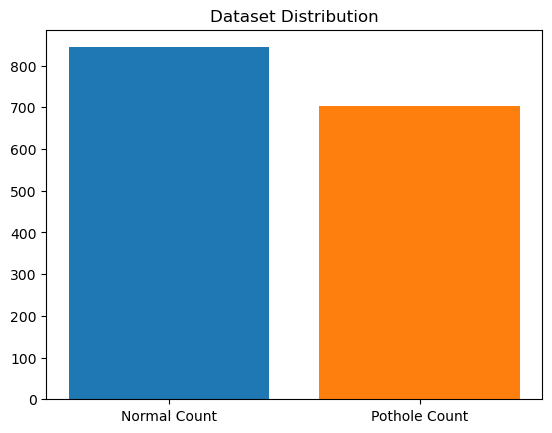

In [123]:
Normal_dir_path = r'Dataset/Normal'
Normal_count = 0

for path in os.listdir(normal_path):
    if os.path.isfile(os.path.join(normal_path, path)):
        Normal_count += 1
print('File count:', Normal_count)

Pothole_dir_path = r'Dataset/Pothole/'
Pothole_count = 0

for path in os.listdir(pothole_path):
    if os.path.isfile(os.path.join(pothole_path, path)):
        Pothole_count += 1
print('File count:', Pothole_count)

plt.bar('Normal Count', Normal_count)
plt.bar('Pothole Count', Pothole_count)
plt.title("Dataset Distribution")


## Load Images into Arrays

In [124]:
pothole_images = [f for f in os.listdir(pothole_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
pothole = []

for image_file in pothole_images:
    image_path = os.path.join(pothole_path, image_file)
    image = cv2.imread(image_path)
    if image is not None:
        pothole.append(image)
    else:
        print(f"Could not load image: {image_path}")

normal_images = [f for f in os.listdir(normal_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
normal = []

for image_file in normal_images:
    image_path = os.path.join(normal_path, image_file)
    image = cv2.imread(image_path)
    if image is not None:
        normal.append(image)
    else:
        print(f"Could not load image: {image_path}")


## Briefly Look at Each Class

Text(0.5, 1.0, 'Normal_example')

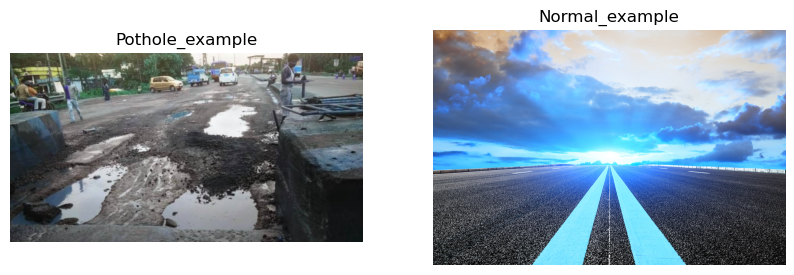

In [125]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

pothole_path = os.getcwd()+'/Dataset/Pothole'
normal_path = os.getcwd()+'/Dataset/Normal'
image_norm = os.listdir(normal_path)
image_pot = os.listdir(pothole_path)

pot_example= random.choice(image_pot)
norm_example = random.choice(image_norm)
Image_1 = cv2.imread(pothole_path+"/"+pot_example)
Image_2 = cv2.imread(normal_path+"/"+norm_example)

fig.add_subplot(rows,columns,1)
plt.imshow(Image_1)
plt.axis('off')
plt.title("Pothole_example")
fig.add_subplot(rows,columns,2)
plt.imshow(Image_2)
plt.axis('off')
plt.title("Normal_example")

## Stats for each class

### Pothole Class:

In [126]:
print("Max width pixels: " + str(max([i.shape[0] for i in pothole])))
print("Min width pixels: " + str(min([i.shape[0] for i in pothole])))
print("Max height pixels: " + str(max([i.shape[1] for i in pothole])))
print("Min height pixels: " + str(min([i.shape[1] for i in pothole])))
print("Avg width pixels: " + str(mean([i.shape[0] for i in pothole])))
print("Avg height pixels: " + str(mean([i.shape[1] for i in pothole])))

Max width pixels: 2365
Min width pixels: 140
Max height pixels: 3200
Min height pixels: 300
Avg width pixels: 377.5860597439545
Avg height pixels: 490.6941678520626


### Normal Class:

In [127]:
print("Max width pixels: " + str(max([i.shape[0] for i in normal])))
print("Min width pixels: " + str(min([i.shape[0] for i in normal])))
print("Max height pixels: " + str(max([i.shape[1] for i in normal])))
print("Min height pixels: " + str(min([i.shape[1] for i in normal])))
print("Avg width pixels: " + str(mean([i.shape[0] for i in normal])))
print("Avg height pixels: " + str(mean([i.shape[1] for i in normal])))

Max width pixels: 3840
Min width pixels: 120
Max height pixels: 5760
Min height pixels: 160
Avg width pixels: 648.1826809015421
Avg height pixels: 792.055753262159


### Height/Width Ratio for Each Class

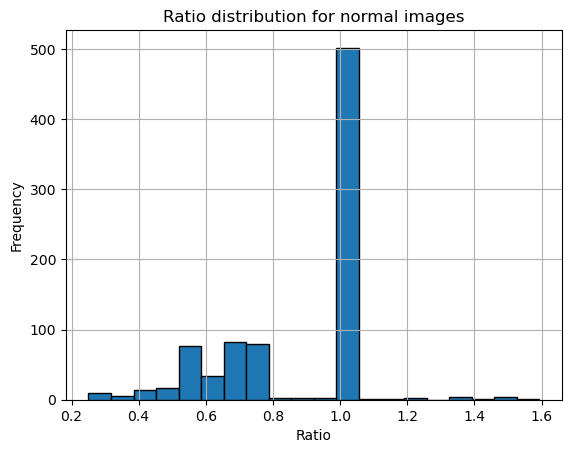

In [128]:
normal_ratio = [i.shape[0] / i.shape[1] for i in normal]
plt.hist(normal_ratio, bins=20, edgecolor='black')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Ratio distribution for normal images')
plt.grid(True)
plt.show()

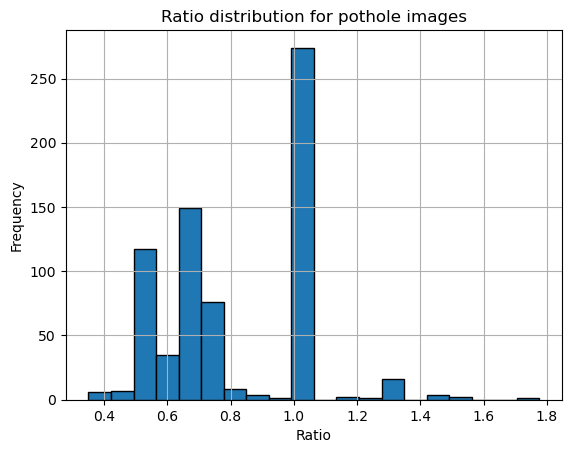

In [129]:
pothole_ratio = [i.shape[0] / i.shape[1] for i in pothole]
plt.hist(pothole_ratio, bins=20, edgecolor='black')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Ratio distribution for pothole images')
plt.grid(True)
plt.show()

## Brightness Info

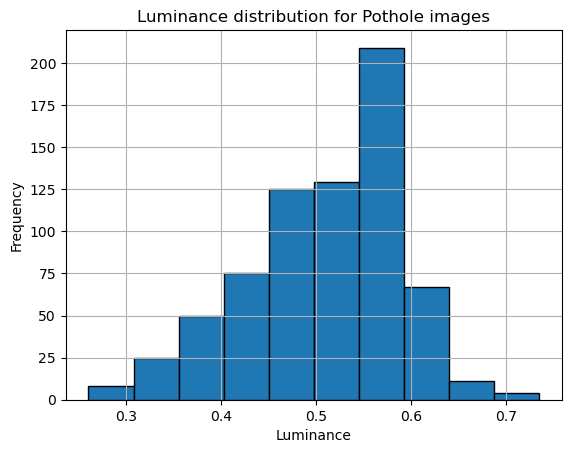

In [130]:
pothole_images = [f for f in os.listdir(pothole_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
pothole = []

for image_file in pothole_images:
    image_path = os.path.join(pothole_path, image_file)
    image = cv2.imread(image_path)
    if image is not None:
        pothole.append(image)
    else:
        print(f"Could not load image: {image_path}")

len(pothole)
ph_lst = []
for image in pothole:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_rgb.shape
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    Luminance = np.mean((0.2126*red_channel + 0.7152*green_channel + 0.0722*blue_channel)/255)
    ph_lst.append(Luminance)
plt.hist(ph_lst, bins=10, edgecolor='black')
plt.xlabel('Luminance')
plt.ylabel('Frequency')
plt.title('Luminance distribution for Pothole images')
plt.grid(True)
plt.show()

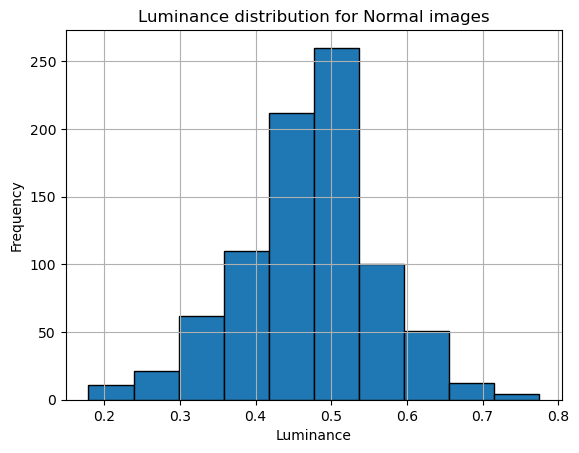

In [131]:
normal_images = [f for f in os.listdir(normal_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
normal = []

for image_file in normal_images:
    image_path = os.path.join(normal_path, image_file)
    image = cv2.imread(image_path)
    
    if image is not None:
        normal.append(image)
    else:
        print(f"Could not load image: {image_path}")

len(normal)

nm_lst = []
for image in normal:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_rgb.shape
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    Luminance = np.mean((0.2126*red_channel + 0.7152*green_channel + 0.0722*blue_channel)/255)
    nm_lst.append(Luminance)
plt.hist(nm_lst, bins=10, edgecolor='black')
plt.xlabel('Luminance')
plt.ylabel('Frequency')
plt.title('Luminance distribution for Normal images')
plt.grid(True)
plt.show()

## Data Processing

In [132]:
import os
from os import listdir
import cv2

## Resizing to 300x300
## Transform from rgb to grayscale
## Update image array

size_w = 300
size_d = 300
point = (size_w, size_d)
lst_pothole = []
for images in os.listdir(pothole_path):
    if (images.endswith(".jpg")):
        im = cv2.imread(pothole_path+"/"+images)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        resized_im = cv2.resize(im, point, interpolation=cv2.INTER_LINEAR)
        lst_pothole.append(resized_im)

lst_normal = []
for images in os.listdir(normal_path):
    if (images.endswith(".jpg")):
        im = cv2.imread(normal_path+"/"+images)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        resized_im = cv2.resize(im, point, interpolation=cv2.INTER_LINEAR)
        lst_normal.append(resized_im)

normal = lst_normal
pothole = lst_pothole


## CNN Model Training

In [133]:
y = [0 for i in normal] + [1 for i in pothole]
y = np.array(y)
X = normal + pothole
X = np.array(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [135]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1), strides=(1, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', strides=(1, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', strides=(1, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    #layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 298, 298, 32)      320       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 149, 149, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 73, 73, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 35, 35, 128)     

## Performance Visualization

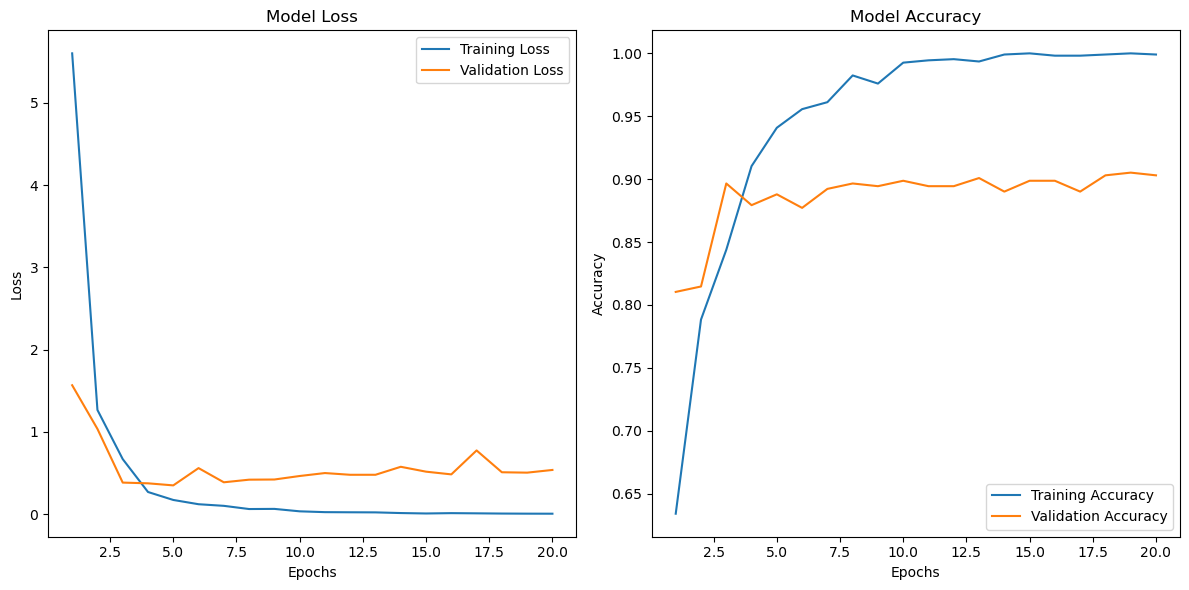

In [136]:
import matplotlib.pyplot as plt
import tensorflow as tf
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Save Model&Weights for Demployment

In [96]:
model_json = model.to_json()
with open("model/pothole_cnn.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model/model_weights.h5")